In [8]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from reward_function import reward_function_ma

In [2]:
data_directory = 'data/reward_function_exploration'

In [3]:
simulations = {}
for style in reward_function_ma.get_styles():
    filepath = os.path.join(data_directory,f'{style}.pkl')

    try:
        with open(filepath,'rb') as f:
            simulations[style] = pickle.load(f)
    except FileNotFoundError as e:
        print(f'No simulation results for {style} reward style.')

No simulation results for exponential reward style.
No simulation results for mixed reward style.


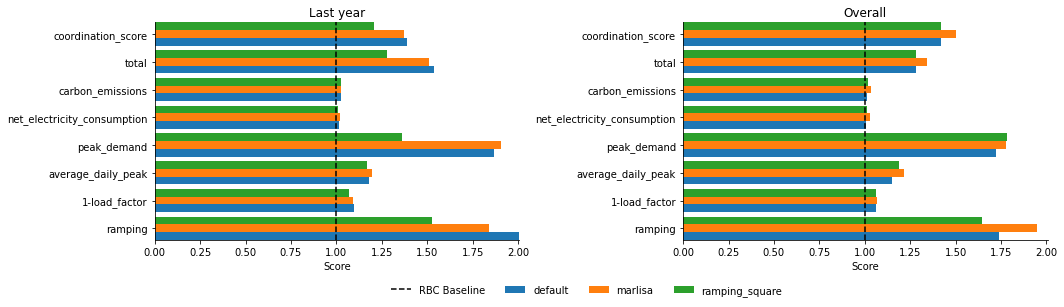

In [62]:
# cost functions
fig, axs = plt.subplots(1,2,figsize=(8*2,4),sharey=False,sharex=True,gridspec_kw={'wspace':0.45})
x_ticks = np.arange(len(
    simulations[list(simulations.keys())[0]]['env'].cost()[0]
))
overall_cost_x_tick_labels = simulations[list(simulations.keys())[0]]['env'].cost()[0].keys()
last_year_cost_x_tick_labels = simulations[list(simulations.keys())[0]]['env'].cost()[0].keys()
width = 0.28

for i, (style, simulation) in enumerate(simulations.items()):
    style_x_ticks = [(x_tick - width*len(simulations)/2) + width*(i + 0.5) for x_tick in x_ticks]
    overall_cost, last_year_cost = simulation['env'].cost()
    axs[0].barh(style_x_ticks,last_year_cost.values(),width,label=style)
    axs[1].barh(style_x_ticks,overall_cost.values(),width,label=style)

for ax, title, y_tick_labels in zip(fig.axes, ['Last year','Overall'], [last_year_cost_x_tick_labels,overall_cost_x_tick_labels]):
    ax.axvline(1,color='black',linestyle='--',label='RBC Baseline')
    ax.set_xlabel('Score')
    ax.set_title(title)
    ax.set_yticks(x_ticks)
    ax.set_yticklabels(y_tick_labels)
    ax.tick_params(axis='y',rotation=0)
    ax.margins(0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig.axes[0].legend(bbox_to_anchor=(0.5,0),
    loc='upper center', 
    bbox_transform=fig.transFigure,
    framealpha=0,
    ncol=len(simulations)+1
)
# plt.tight_layout()
plt.show()
